In [1]:
import sys
lib_path = '/home/jovyan/libs'
sys.path.insert(0, lib_path)

In [4]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import whisper
from datasets import load_from_disk

In [3]:
tensors_path = "tensors"
train_success = torch.load(f"{tensors_path}/train_success.pt", weights_only=True)
train_ids = torch.load(f"{tensors_path}/train_ids.pt", weights_only=True)

valid_success = torch.load(f"{tensors_path}/valid_success.pt", weights_only=True)
valid_ids = torch.load(f"{tensors_path}/valid_ids.pt", weights_only=True)

# Training

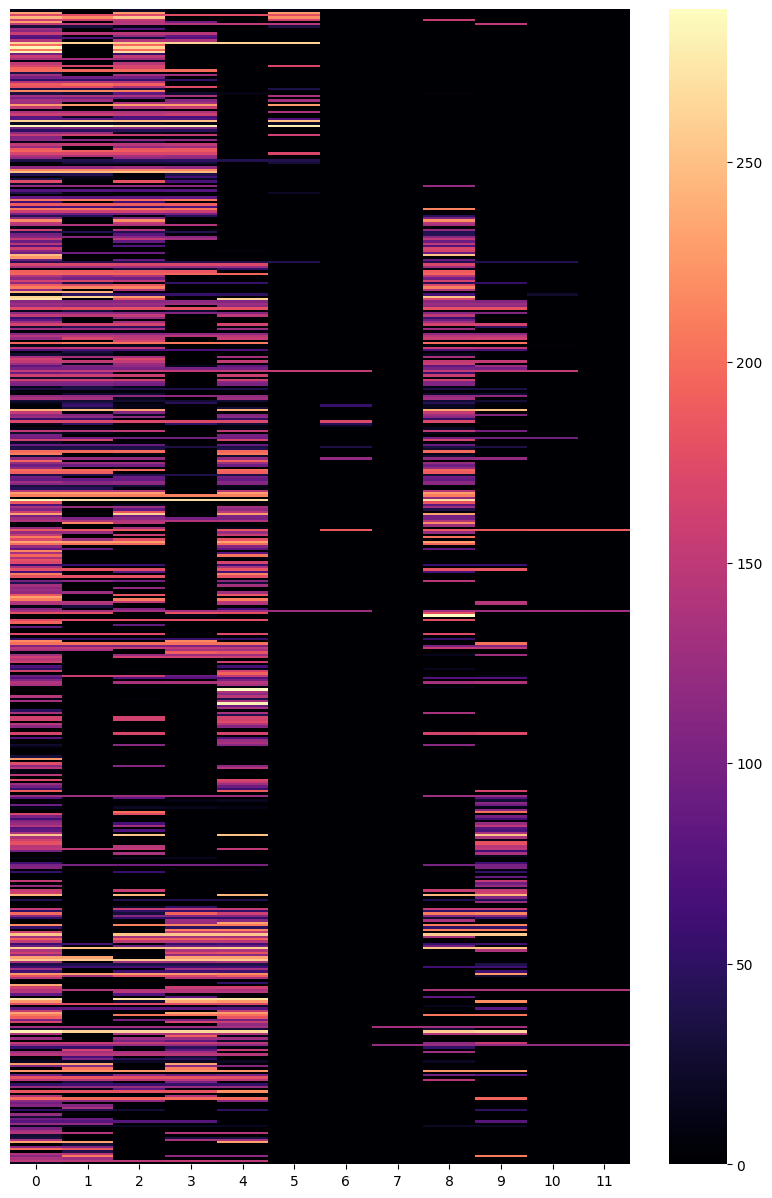

In [45]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.tick_params(left=False, labelleft=False)
ax = sns.heatmap(train_success, cmap="magma", ax=ax)

# Validation

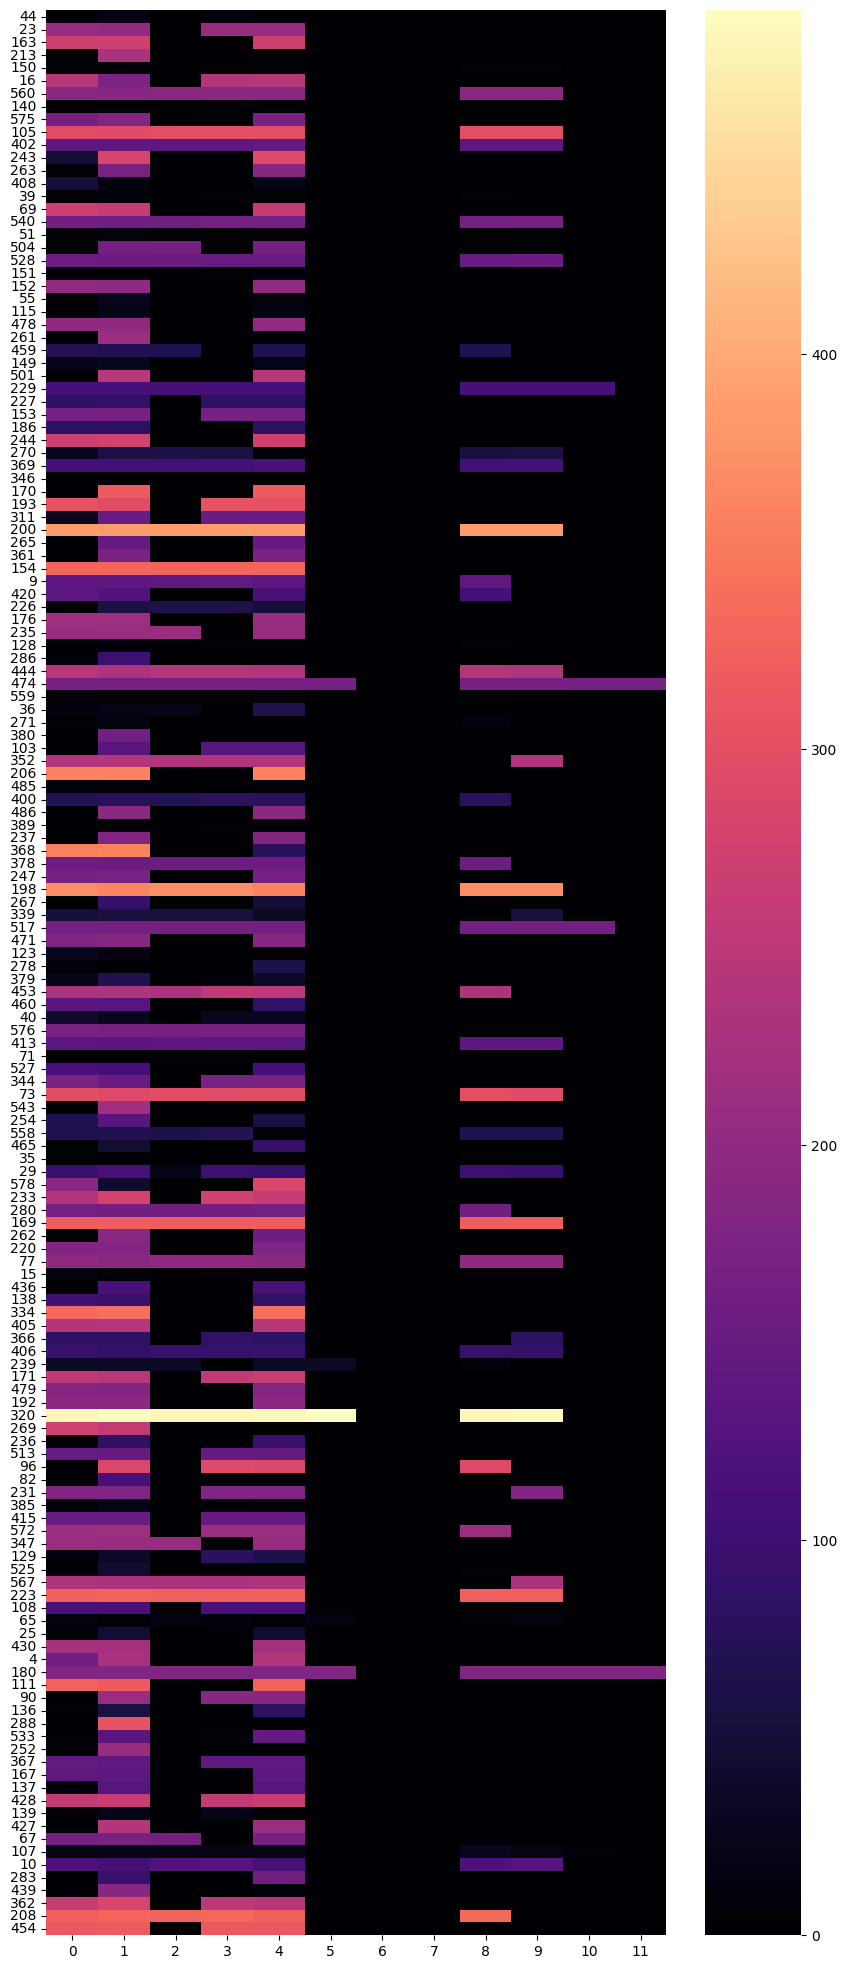

In [49]:
fig, ax = plt.subplots(figsize=(10, 25))
ax = sns.heatmap(valid_success, yticklabels=valid_ids.tolist(), cmap="magma", ax=ax)

# Audio

In [115]:
def view_mels(filtered, figsize=None) -> None:
    if not figsize:
        figsize = (10, len(filtered) * 1.5)
    fig, ax = plt.subplots(len(filtered), 1, figsize=figsize)
    
    for i in range(len(filtered)):
        mel = whisper.log_mel_spectrogram(filtered[i]["audio"])
        ax[i].imshow(mel)
        ax[i].set_title(f"Example {filtered[i]['idx']}")
    plt.tight_layout()
    plt.show()

In [95]:
def validate_idx(ids, filtered) -> None:
    assert len(ids) == len(filtered), f"Length mismatch! Ids have len {len(ids)} but filtered has len {len(filtered)}"
    for i in range(len(ids)):
        assert ids[i] == filtered[i]["idx"], f"Id mismatch at position {i}"

In [77]:
valid = load_from_disk("../tedlium/validation_idx.hf").with_format("torch")
train = load_from_disk("../tedlium/train_idx.hf").with_format("torch")

Loading dataset from disk:   0%|          | 0/109 [00:00<?, ?it/s]

In [91]:
v_select = [180, 474]
v_filtered = valid.select(v_select)

In [90]:
t_select = train_success[:,-1].nonzero().squeeze().tolist()
print(t_select)
t_filtered = train.select(t_select)

[225, 260, 424, 448]


In [97]:
validate_idx(v_select, v_filtered)
validate_idx(t_select, t_filtered)

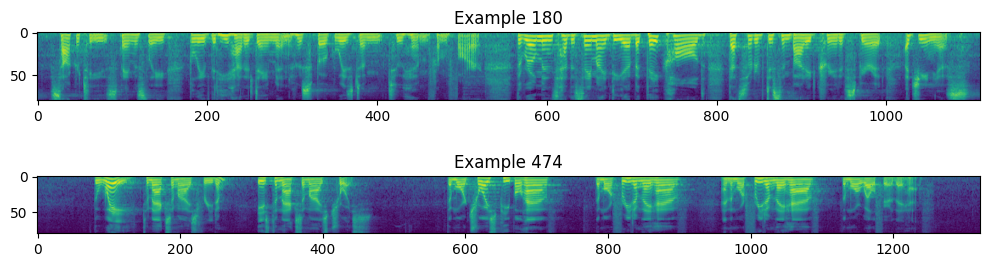

In [116]:
view_mels(v_filtered)

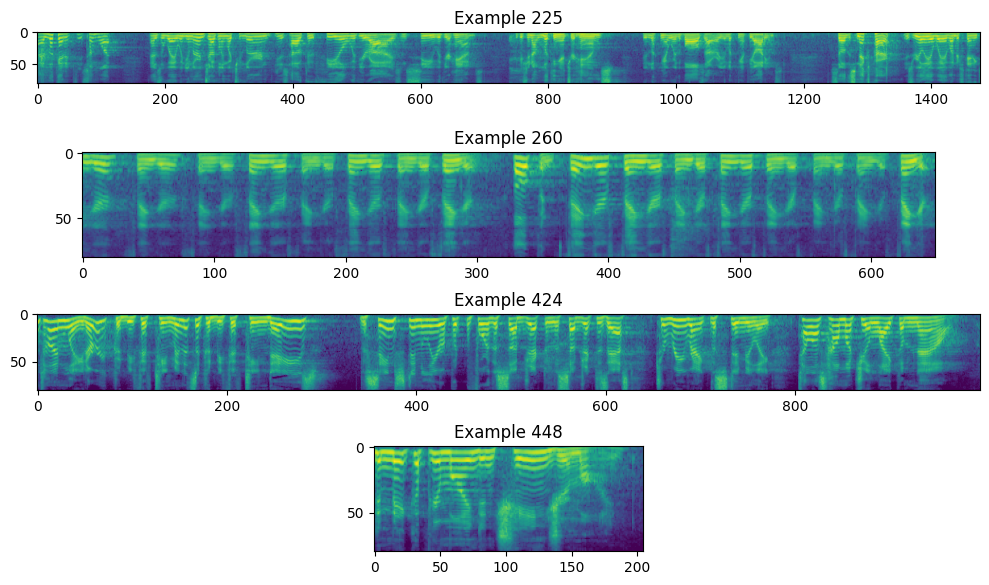

In [117]:
view_mels(t_filtered)